In [1]:
import pandas as pd


AAPL = pd.read_csv(r"C:\taewon_project\Multimodal_Transformer\data\kdd17\price_long_50\AAPL.csv") #2518
gold = pd.read_csv(r"C:\taewon_project\Multimodal_Transformer\data\kdd17\modality3\gold.csv") # 2559
nasdaq100 = pd.read_csv(r"C:\taewon_project\Multimodal_Transformer\data\kdd17\modality3\nasdaq100.csv") #2518
us_2y_bond = pd.read_csv(r"C:\taewon_project\Multimodal_Transformer\data\kdd17\modality3\us_2y_bond.csv") # 2585
us_10y_bond = pd.read_csv(r"C:\taewon_project\Multimodal_Transformer\data\kdd17\modality3\us_10y_bond.csv") # 2761
us_30y_bond = pd.read_csv(r"C:\taewon_project\Multimodal_Transformer\data\kdd17\modality3\us_30y_bond.csv") # 2584
us_dollars = pd.read_csv(r"C:\taewon_project\Multimodal_Transformer\data\kdd17\modality3\us_dollars.csv") # 2586
WTI_oil = pd.read_csv(r"C:\taewon_project\Multimodal_Transformer\data\kdd17\modality3\WTI_oil.csv") # 2556

nasdaq100 = nasdaq100.loc[:,["date","Close"]]
us_2y_bond = us_2y_bond.loc[:,["date","Close"]]
us_10y_bond = us_10y_bond.loc[:,["date","Close"]]
us_30y_bond = us_30y_bond.loc[:,["date","Close"]]
us_dollars = us_dollars.loc[:,["date","Close"]]
WTI_oil = WTI_oil.loc[:,["date","Close"]]


In [2]:
nas_us2y = pd.merge(left = nasdaq100 , right = us_2y_bond, how = "inner", on = "date")

nas_us2y_10y = pd.merge(left = nas_us2y , right = us_10y_bond, how = "inner", on = "date")

nas_us2y_10y_30y = pd.merge(left = nas_us2y_10y , right = us_30y_bond, how = "inner", on = "date")

nas_us2y_10y_30y_dollars = pd.merge(left = nas_us2y_10y_30y , right = us_dollars, how = "inner", on = "date")

nas_us2y_10y_30y_dollars_WTI = pd.merge(left = nas_us2y_10y_30y_dollars , right = WTI_oil, how = "inner", on = "date")



C:\Users\lab\AppData\Local\Temp/ipykernel_8672/289940710.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Close_x'} in the result is deprecated and will raise a MergeError in a future version.
  nas_us2y_10y_30y = pd.merge(left = nas_us2y_10y , right = us_30y_bond, how = "inner", on = "date")
C:\Users\lab\AppData\Local\Temp/ipykernel_8672/289940710.py:9: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Close_x'} in the result is deprecated and will raise a MergeError in a future version.
  nas_us2y_10y_30y_dollars_WTI = pd.merge(left = nas_us2y_10y_30y_dollars , right = WTI_oil, how = "inner", on = "date")


In [35]:
nas_us2y_10y_30y_dollars_WTI.columns = ["date", "nasdaq100","us_2y_bond","us_10y_bond","us_30y_bond","us_dollars","WTI_oil"]




In [36]:
nas_us2y_10y_30y_dollars_WTI.to_csv(r"C:\taewon_project\Multimodal_Transformer\data\kdd17\modality3.csv")  


In [2]:
import pandas as pd
import numpy as np

stock_data = pd.read_csv("C:/taewon_project/bilstm_attention_ti_cor/data/kdd17/price_long_50_/AAPL.csv" ,header=0)
modality3_data = pd.read_csv(r"C:\taewon_project\Multimodal_Transformer\data\kdd17\modality3.csv",header=0)

# modality3_data['Date'] = pd.to_datetime(modality3_data["Date"])
# modality3_data['Date'] = modality3_data["Date"].dt.strftime('%m/%d/%Y')

stock_data['Date'] = pd.to_datetime(stock_data["Date"])
stock_data['Date'] = stock_data["Date"].dt.strftime('%Y/%m/%d')

modality3_data['Date'] = pd.to_datetime(modality3_data['Date'])
modality3_data['Date'] = modality3_data['Date'].dt.strftime('%Y/%m/%d')

## inner join은 on 에서 교집합만 출력
stdata_modality3 = pd.merge(left = stock_data , right = modality3_data, how = "inner", on = "Date") 

stdata_modality3['Date2'] = pd.to_datetime(stdata_modality3["Date"])
print(stdata_modality3.dtypes)

stdata_modality3['month'] = stdata_modality3['Date2'].dt.strftime("%m")
stdata_modality3['wd'] = stdata_modality3['Date2'].dt.dayofweek




open = stdata_modality3.loc[:,"Open"]
high = stdata_modality3.loc[:,"High"]
low = stdata_modality3.loc[:,"Low"]
close = stdata_modality3.loc[:,"Adj Close"]
volume = stdata_modality3.loc[:,"Volume"]

upndown = (stdata_modality3.loc[:, "Adj Close"] - stdata_modality3.loc[:, "Adj Close"].shift(periods=-1, axis=0))
change = (((stdata_modality3.loc[:, "Adj Close"] - stdata_modality3.loc[:, "Adj Close"].shift(periods=-1, axis=0))/stock_data.loc[:, "Adj Close"].shift(periods=-1, axis=0))*100)
tgt = np.where(stdata_modality3.loc[:, "Adj Close"] >= stdata_modality3.loc[:, "Adj Close"].shift(periods=-1, axis=0), 1.0, 0.0)




Date                     object
Original_Open           float64
High                    float64
Low                     float64
Close                   float64
Volume                    int64
Adj Close               float64
Unnamed: 7              float64
Open                    float64
Unnamed: 0                int64
nasdaq100                object
us_2y_bond              float64
us_10y_bond             float64
us_30y_bond             float64
us_dollars              float64
WTI_oil                 float64
Date2            datetime64[ns]
dtype: object


In [13]:
stdata_modality3['month']
stdata_modality3['wd']




modality22 = pd.get_dummies(stdata_modality3['month'])

modality22.columns = ["m1","m2","m3","m4","m5","m6","m7","m8","m9","m10","m11","m12"]

modality222 = pd.get_dummies(stdata_modality3['wd'])
modality222.columns = ["MON","TUE","WED","THU","FRI"]

modality22 = pd.concat([stdata_modality3["Date"], modality22], axis=1)
modality222 = pd.concat([stdata_modality3["Date"], modality222], axis=1)

modality2 = pd.merge(left = modality22 , right = modality222, how = "inner", on = "Date")
print(modality2)

modality2.to_csv(r"C:\taewon_project\Multimodal_Transformer\data\kdd17\modality2.csv")  




            Date  m1  m2  m3  m4  m5  m6  m7  m8  m9  m10  m11  m12  MON  TUE  \
0     2016/12/30   0   0   0   0   0   0   0   0   0    0    0    1    0    0   
1     2016/12/29   0   0   0   0   0   0   0   0   0    0    0    1    0    0   
2     2016/12/28   0   0   0   0   0   0   0   0   0    0    0    1    0    0   
3     2016/12/27   0   0   0   0   0   0   0   0   0    0    0    1    0    1   
4     2016/12/23   0   0   0   0   0   0   0   0   0    0    0    1    0    0   
...          ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...   
2507  2007/01/09   1   0   0   0   0   0   0   0   0    0    0    0    0    1   
2508  2007/01/08   1   0   0   0   0   0   0   0   0    0    0    0    1    0   
2509  2007/01/05   1   0   0   0   0   0   0   0   0    0    0    0    0    0   
2510  2007/01/04   1   0   0   0   0   0   0   0   0    0    0    0    0    0   
2511  2007/01/03   1   0   0   0   0   0   0   0   0    0    0    0    0    0   

      WED  THU  FRI  
0    

In [8]:
import pandas as pd
import numpy as np

stock_data = pd.read_csv("C:/taewon_project/bilstm_attention_ti_cor/data/kdd17/price_long_50_/AAPL.csv" ,header=0)
modality2_data = pd.read_csv(r"C:\taewon_project\Multimodal_Transformer\data\kdd17\modality2.csv",header=0)
modality3_data = pd.read_csv(r"C:\taewon_project\Multimodal_Transformer\data\kdd17\modality3.csv",header=0)

stock_data['Date'] = pd.to_datetime(stock_data["Date"])
stock_data['Date'] = stock_data["Date"].dt.strftime('%Y/%m/%d')

modality3_data['Date'] = pd.to_datetime(modality3_data['Date'])
modality3_data['Date'] = modality3_data['Date'].dt.strftime('%Y/%m/%d')

## inner join은 on 에서 교집합만 출력
stdata_modality3 = pd.merge(left = stock_data , right = modality3_data, how = "inner", on = "Date") 

open = stdata_modality3.loc[:,"Open"]
high = stdata_modality3.loc[:,"High"]
low = stdata_modality3.loc[:,"Low"]
close = stdata_modality3.loc[:,"Adj Close"]
volume = stdata_modality3.loc[:,"Volume"]

print(modality2_data)
print(stdata_modality3)

df = np.column_stack(( modality2_data, stdata_modality3))
print(df)

      Unnamed: 0        Date  m1  m2  m3  m4  m5  m6  m7  m8  m9  m10  m11  \
0              0  2016/12/30   0   0   0   0   0   0   0   0   0    0    0   
1              1  2016/12/29   0   0   0   0   0   0   0   0   0    0    0   
2              2  2016/12/28   0   0   0   0   0   0   0   0   0    0    0   
3              3  2016/12/27   0   0   0   0   0   0   0   0   0    0    0   
4              4  2016/12/23   0   0   0   0   0   0   0   0   0    0    0   
...          ...         ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...   
2507        2507  2007/01/09   1   0   0   0   0   0   0   0   0    0    0   
2508        2508  2007/01/08   1   0   0   0   0   0   0   0   0    0    0   
2509        2509  2007/01/05   1   0   0   0   0   0   0   0   0    0    0   
2510        2510  2007/01/04   1   0   0   0   0   0   0   0   0    0    0   
2511        2511  2007/01/03   1   0   0   0   0   0   0   0   0    0    0   

      m12  MON  TUE  WED  THU  FRI  
0       1    0    0    0  

In [22]:
import pandas as pd


stock_data = pd.read_csv(r"C:\Users\USER\Desktop\Multimodal_Transformer-main/data/kdd17/price_long_50/PTR.csv" ,header=0)



# print(stock_data.loc[:,"Open"][stock_data.loc[:,"Open"]<=0.0])
# print(stock_data.loc[:,"High"][stock_data.loc[:,"High"]<=0.0])
# print(stock_data.loc[:,"Low"][stock_data.loc[:,"Low"]<=0.0])
# print(stock_data.loc[:,"Adj Close"][stock_data.loc[:,"Adj Close"]<=0.0])
# print(stock_data.loc[:,"Volume"][stock_data.loc[:,"Volume"]<=0.0])

print(stock_data.loc[:,"Open"].isna().sum())
print(stock_data.loc[:,"High"].isna().sum())
print(stock_data.loc[:,"Low"].isna().sum())
print(stock_data.loc[:,"Adj Close"].isna().sum())
print(stock_data.loc[:,"Volume"].isna().sum())

0
0
0
0
0


In [11]:
import pandas as pd
import copy as copy
import numpy as np

stock_data = pd.read_csv("C:/Users/USER/Desktop/Multimodal_Transformer-main/data/kdd17/price_long_50/PTR.csv" ,header=0)
modality2_data = pd.read_csv(r"C:\Users\USER\Desktop\Multimodal_Transformer-main\data\kdd17\modality2.csv",header=0)
modality3_data = pd.read_csv(r"C:\Users\USER\Desktop\Multimodal_Transformer-main\data\kdd17\modality3.csv",header=0)

# modality3_data['Date'] = pd.to_datetime(modality3_data["Date"])
# modality3_data['Date'] = modality3_data["Date"].dt.strftime('%m/%d/%Y')

stock_data['Date'] = pd.to_datetime(stock_data["Date"])
stock_data['Date'] = stock_data["Date"].dt.strftime('%Y/%m/%d')
modality3_data['Date'] = pd.to_datetime(modality3_data['Date'])
modality3_data['Date'] = modality3_data['Date'].dt.strftime('%Y/%m/%d') 

## inner join은 on 에서 교집합만 출력
stdata_modality3 = pd.merge(left = stock_data , right = modality3_data, how = "inner", on = "Date") 

open = stdata_modality3.loc[:,"Open"]
high = stdata_modality3.loc[:,"High"]
low = stdata_modality3.loc[:,"Low"]
close = stdata_modality3.loc[:,"Adj Close"]
volume = stdata_modality3.loc[:,"Volume"]

nasdaq100 = stdata_modality3.loc[:,"nasdaq100"]
us_2y_bond = stdata_modality3.loc[:,"us_2y_bond"]
us_10y_bond = stdata_modality3.loc[:,"us_10y_bond"]
us_30y_bond = stdata_modality3.loc[:,"us_30y_bond"]
us_dollars = stdata_modality3.loc[:,"us_dollars"]
WTI_oil = stdata_modality3.loc[:,"WTI_oil"]

m1 = modality2_data.loc[:,"m1"]
m2 = modality2_data.loc[:,"m2"]
m3 = modality2_data.loc[:,"m3"]
m4 = modality2_data.loc[:,"m4"]
m5 = modality2_data.loc[:,"m5"]
m6 = modality2_data.loc[:,"m6"]
m7 = modality2_data.loc[:,"m7"]
m8 = modality2_data.loc[:,"m8"]
m9 = modality2_data.loc[:,"m9"]
m10 = modality2_data.loc[:,"m10"]
m11 = modality2_data.loc[:,"m11"]
m12 = modality2_data.loc[:,"m12"]
MON = modality2_data.loc[:,"MON"]
TUE = modality2_data.loc[:,"TUE"]
WED = modality2_data.loc[:,"WED"]
THU = modality2_data.loc[:,"THU"]
FRI = modality2_data.loc[:,"FRI"]

modality2 = pd.concat([m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,MON,TUE,WED,THU,FRI],axis=1,ignore_index=True)

modality3 = pd.concat([nasdaq100,us_2y_bond,us_10y_bond,us_30y_bond,us_dollars,WTI_oil],axis=1,ignore_index=True)




upndown = copy.copy(stdata_modality3.loc[:, "Adj Close"] - stdata_modality3.loc[:, "Adj Close"].shift(periods=-1, axis=0))
change = copy.copy(((stdata_modality3.loc[:, "Adj Close"] - stdata_modality3.loc[:, "Adj Close"].shift(periods=-1, axis=0))/stdata_modality3.loc[:, "Adj Close"].shift(periods=-1, axis=0))*100)
tgt = np.where(stdata_modality3.loc[:, "Adj Close"] >= stdata_modality3.loc[:, "Adj Close"].shift(periods=-1, axis=0), 1.0, 0.0)
tgt = pd.DataFrame(tgt)
## -------------------------------------------------------------------------------------- ##
# 위 라인 이전단계에서 다른데이터셋들과 날짜를 맞춘 후 입력으로 들어가야 함
## -------------------------------------------------------------------------------------- ##

# technical_indicator

# 1) 10일 이동평균
ten_day_ma = copy.copy(stdata_modality3.loc[:, "Adj Close"])
for i in range(9):
    ten_day_ma += stdata_modality3.loc[:, "Adj Close"].shift(periods = -i-1, axis = 0)

ten_day_ma = ten_day_ma/10 ## 마지막 nan 9개가 생김
    
# 2) 10일 가중 이동평균
w_ten_day_ma = copy.copy(stdata_modality3.loc[:, "Adj Close"])
w_ten_day_ma_10 = copy.copy(w_ten_day_ma*10)
for i in range(9):
    w_ten_day_ma_10 += (9-i)*stdata_modality3.loc[:, "Adj Close"].shift(periods = -i-1, axis = 0)

wma = w_ten_day_ma_10/((10*9)/2)

del w_ten_day_ma
del w_ten_day_ma_10

# 3) momentum
momentum = stdata_modality3.loc[:, "Adj Close"] - stdata_modality3.loc[:, "Adj Close"].shift(periods = -10, axis = 0)


# 4) stochastic_K%
init_low = copy.copy(stdata_modality3.loc[:, "Low"])
init_high = copy.copy(stdata_modality3.loc[:, "High"])

for i in range(9):
    second_low = copy.copy(stdata_modality3.loc[:, "Low"].shift(periods = -i-1, axis = 0))
    second_high = copy.copy(stdata_modality3.loc[:, "High"].shift(periods = -i-1, axis = 0))

    if i == 0:
        lows = pd.concat([init_low,second_low],axis = 1,ignore_index=True)
        highs = pd.concat([init_high,second_high],axis = 1,ignore_index=True)
    else:
        lows = pd.concat([lows,second_low],axis = 1,ignore_index=True)
        highs = pd.concat([highs,second_high],axis = 1,ignore_index=True)

row_low = lows.min(axis=1)
row_high = highs.max(axis=1)

stochastic_K = ((stdata_modality3.loc[:,"Close"]-row_low)/(row_high-row_low))*100

del row_low
del row_high
del lows
del highs
del second_low
del second_high
del init_low
del init_high

# 4) stochastic_D%
stochastic_D = copy.copy(stochastic_K)
for i in range(9):
    stochastic_D += stochastic_K.shift(periods = -i-1, axis = 0)
stochastic_D = stochastic_D/10    

# RSI
difference = stdata_modality3.loc[:, "Adj Close"] - stdata_modality3.loc[:, "Adj Close"].shift(periods = -1, axis = 0)

u = abs(difference.where(difference>0,0))
d = abs(difference.where(difference<0,0))
init_u = copy.copy(u)
init_d = copy.copy(d)

for i in range(9):
    init_u += u.shift(periods = -i-1, axis = 0)
    init_d += d.shift(periods = -i-1, axis = 0)

AU = init_u/10
AD = init_d/10

RSI = 100-100/(1+AU/AD)

del AU
del AD
del init_u
del init_d
del u
del d
del difference

df1 = stdata_modality3.loc[:, "Adj Close"]

df1 = df1.iloc[::-1]


ema_12 = df1.ewm(span=12,min_periods=11,adjust = True).mean()
ema_26 = df1.ewm(span=26,min_periods=25,adjust = True).mean()

# MACD
MACD =  ema_12 - ema_26

MACD = MACD[::-1]

del ema_12
del ema_26
del df1

# Larry_williams_R 
LWR = ((stdata_modality3.loc[:,"High"]-stdata_modality3.loc[:,"Close"])/(stdata_modality3.loc[:,"High"]-stdata_modality3.loc[:,"Low"]))*100

# A_D_Oscillator 
A_D = (stdata_modality3.loc[:,"High"]-stdata_modality3.loc[:,"Close"].shift(periods=-1, axis=0))/(stdata_modality3.loc[:,"High"]-stdata_modality3.loc[:,"Low"])

# CCI
MT = stdata_modality3.loc[:,"High"]+stdata_modality3.loc[:,"Low"]+stdata_modality3.loc[:,"Close"]/3
SMT = copy.copy(MT)
for i in range(9):
    SMT += MT.shift(periods=-1-i, axis=0)

SMT = SMT/10

DT = abs(MT.shift(periods=-9, axis=0) - SMT)
for i in range(9):
    DT += abs(MT.shift(periods=-i, axis=0) - SMT)

DT = DT/10

CCI = (MT -SMT)/(0.015*DT)

del MT
del DT
del SMT

d_len = len(RSI)

modality1  = pd.concat([open, high, low, close, volume, upndown, change, ten_day_ma, wma, momentum, stochastic_K, stochastic_D, RSI, MACD, LWR, A_D, CCI], axis=1,ignore_index=True)
df = pd.concat([modality1,modality2,modality3], axis=1,ignore_index=True)

data = pd.concat([df,tgt], axis=1,ignore_index=True)
data = data.iloc[:(d_len-24)][:(d_len-24)][::-1].copy()



modality1 = modality1[:(d_len-24)][:(d_len-24)]
modality1.iloc[:,14][modality1.iloc[:,14].isnull()]
            

842   NaN
Name: 14, dtype: float64

[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]
[[1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]
 [4 4 4 4]]
[1 2 3 4 1 2 3 4 1 2 3 4 1 2 3 4]
[1 1 1 1 2 2 2 2 3 3 3 3 4 4 4 4]
[2 3 4 5 3 4 5 6 4 5 6 7 5 6 7 8]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


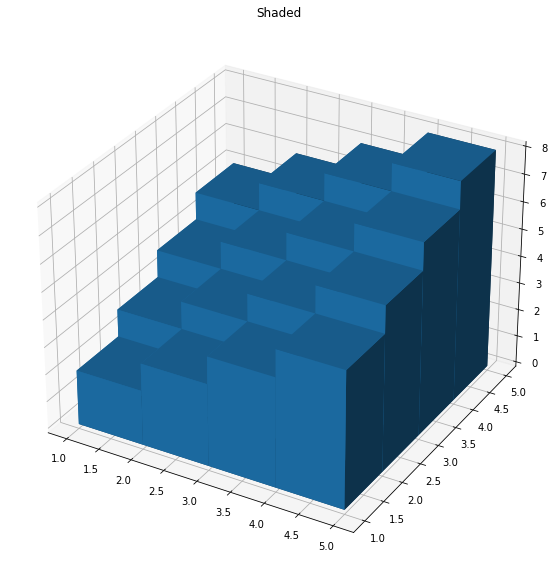

In [30]:
import numpy as np
import matplotlib.pyplot as plt


# setup the figure and axes
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111, projection='3d')


# fake data
_x = [i for i in list(range(1, 5))]
_y = [i for i in list(range(1, 5))]
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()
print(_xx)
print(_yy)

top = x + y
print(x)
print(y)
print(top)
bottom = np.zeros_like(top)
print(bottom)
width = depth = 1

ax1.bar3d(x, y, bottom, width, depth, top, shade=True)


plt.show()